<a href="https://colab.research.google.com/github/sakthipriyas/DataScience/blob/main/Churn_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In data analysis, churn refers to the phenomenon of customers or users discontinuing their relationship with a company or ceasing their engagement with a product or service. It is commonly used in industries such as telecommunications, software, subscription-based services, and e-commerce.**

**Churn analysis focuses on understanding and predicting customer attrition rates, identifying factors that contribute to churn, and developing strategies to mitigate it. By analyzing historical data and patterns, companies can gain insights into why customers are leaving and take proactive measures to retain them.**

**Churn can be classified into two types:**

**Customer Churn: This refers to the loss of customers or users. Customer churn analysis aims to understand the reasons behind customer attrition and develop retention strategies. It typically involves analyzing customer behavior, demographics, purchase history, customer support interactions, and other relevant data.**

**Revenue Churn: This refers to the loss of revenue generated from existing customers. Revenue churn analysis focuses on understanding the monetary impact of customer attrition. It involves analyzing changes in recurring revenue, average revenue per user, and other financial metrics.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
# Read file and check basic information
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Objective : To analyse customer churn.

Data sample size : 7043, 21
target : churn


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis

In [7]:
# 1. Check for null/nan values
#df.isna().sum()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Check for consistency in datatypes and the actual data.

first_rows = df.head()

# Print the first rows
#print(first_rows)

# Print the value and type of each column in the first rows
for column in first_rows.columns:
    column_values = first_rows[column]
    value = column_values.values[0]
    value_type = type(value).__name__
    print(f"Column: {column} - Value: {value} - Type: {value_type}\n")

Column: customerID - Value: 7590-VHVEG - Type: str

Column: gender - Value: Female - Type: str

Column: SeniorCitizen - Value: 0 - Type: int64

Column: Partner - Value: Yes - Type: str

Column: Dependents - Value: No - Type: str

Column: tenure - Value: 1 - Type: int64

Column: PhoneService - Value: No - Type: str

Column: MultipleLines - Value: No phone service - Type: str

Column: InternetService - Value: DSL - Type: str

Column: OnlineSecurity - Value: No - Type: str

Column: OnlineBackup - Value: Yes - Type: str

Column: DeviceProtection - Value: No - Type: str

Column: TechSupport - Value: No - Type: str

Column: StreamingTV - Value: No - Type: str

Column: StreamingMovies - Value: No - Type: str

Column: Contract - Value: Month-to-month - Type: str

Column: PaperlessBilling - Value: Yes - Type: str

Column: PaymentMethod - Value: Electronic check - Type: str

Column: MonthlyCharges - Value: 29.85 - Type: float64

Column: TotalCharges - Value: 29.85 - Type: str

Column: Churn - Va

### Observation: Mismatch in datatype and value for column 'TotalCharges'

In [9]:
# Converting the datatype of 'TotalCharges' string to numeric.
# Note: use to_numeric(). This will keep the value as such by removing only the quotions.
#       as_type() will do additional datatype conversion which may change the original value.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df['TotalCharges'].dtype

dtype('float64')

In [11]:
# Check for nan values again particularly in 'TotalCharges' after data conversion
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Dropped nan values as the number (11) is insignificant compared to sample size(7046)
df.dropna(inplace=True)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# Check for duplicates. If duplicates present, then remove them.
# Otherwise the trained  model may give biased predictions
df.duplicated().sum()

0

In [14]:
# Dropping unimportant feature - customer ID

df_1 = df.iloc[:, 1:]

In [15]:
#Replace the target feature 'Churn' with discrete values.

df_1['Churn'].replace(to_replace=['Yes', 'No'], value=[1, 0], inplace=True)
df_1['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [16]:
#Replace catergorical features with dummies.

df_dummies = pd.get_dummies(df_1)

In [17]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


###Significant features - first analysis using correlation!

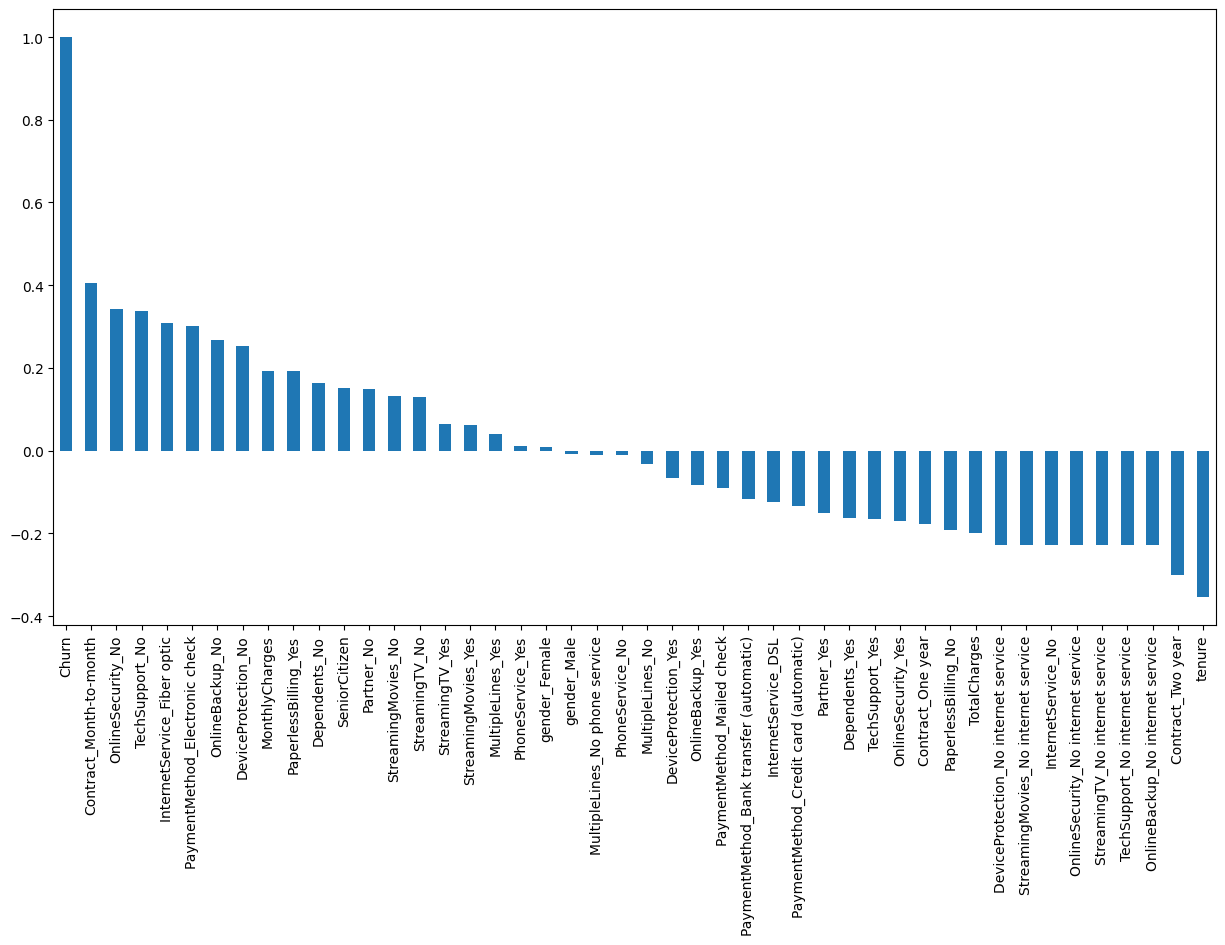

In [18]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');


Text(0.5, 1.0, '% of Senior Citizens')

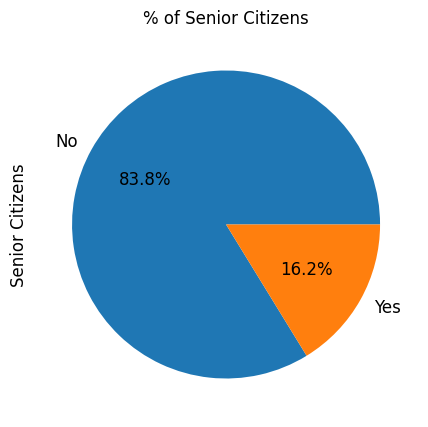

In [19]:
#@title EDA - feature analysis - Senior citizen
ax = (df_dummies['SeniorCitizen'].value_counts()*100.0 /len(df_dummies))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

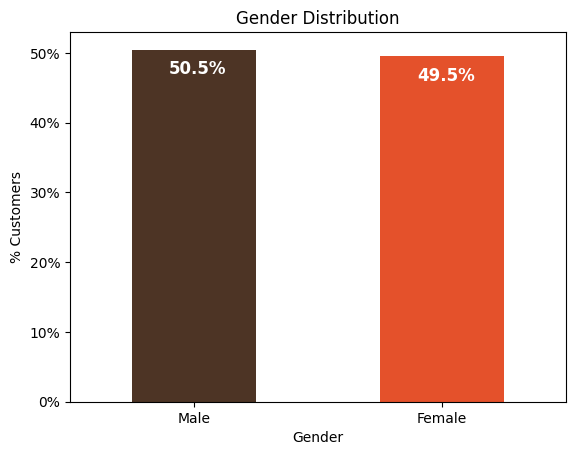

In [20]:
#@title EDA - feature analysis - gender distribution
colors = ['#4D3425','#E4512B']
ax = (df_1['gender'].value_counts()*100.0 /len(df_1)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

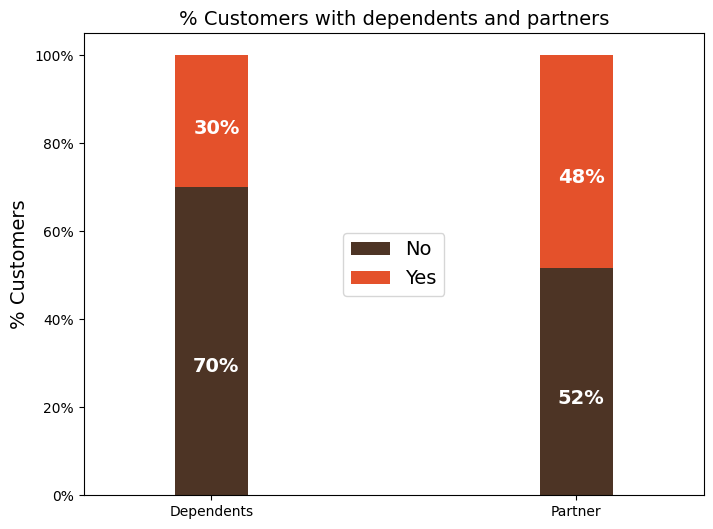

In [22]:
#@title EDA - feature analysis - Dependents, Partner
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [23]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


###'tenure' is the number of months the customer is with the company. Observation: On the first month, the number of customers is more! And more customers in 72nd (6 years) month. Why? Anything special about the contract type? Plotting the following bar plot to understand the contract type.

<ipython-input-24-07c3ba9d5717>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_dummies['tenure'], kde = False, color ='red', bins = 72, hist=True)


<Axes: xlabel='tenure'>

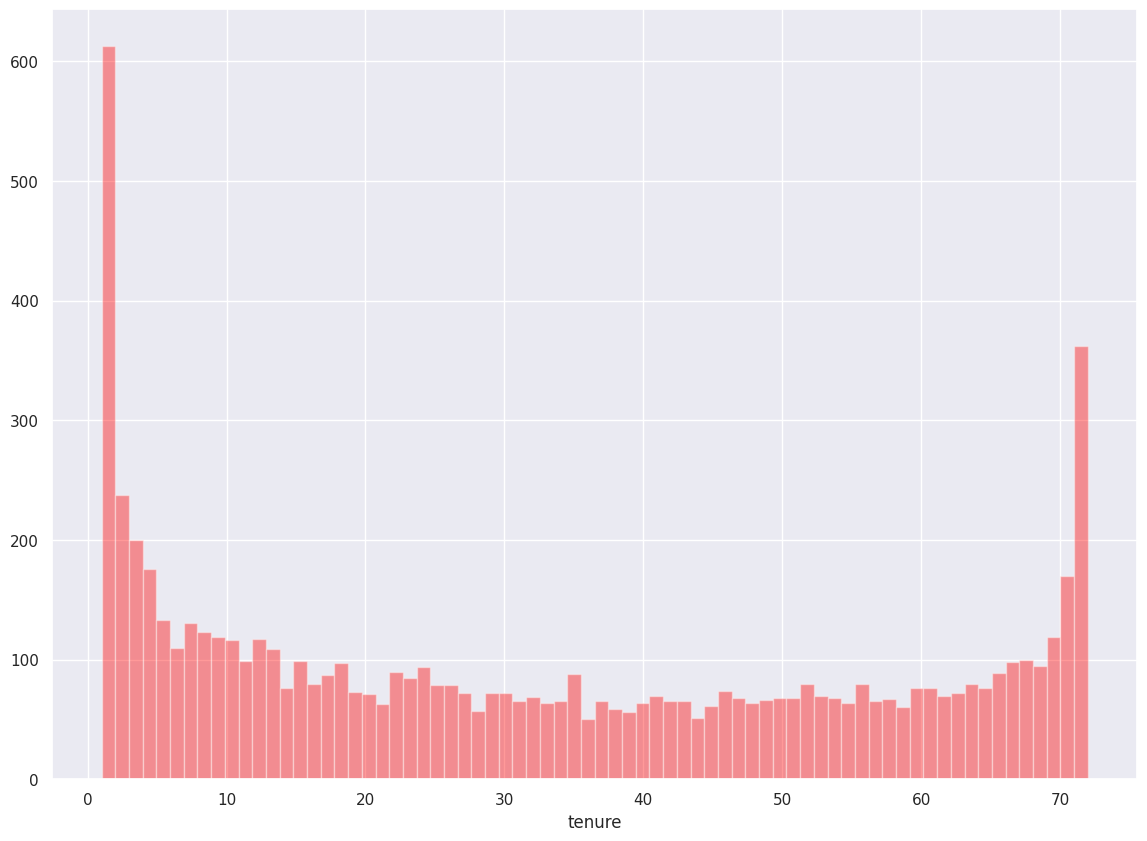

In [24]:
sns.set(rc={'figure.figsize':(14,10)})
sns.distplot(df_dummies['tenure'], kde = False, color ='red', bins = 72, hist=True)


In [ ]:
df_dummies['tenure'].nunique()

72

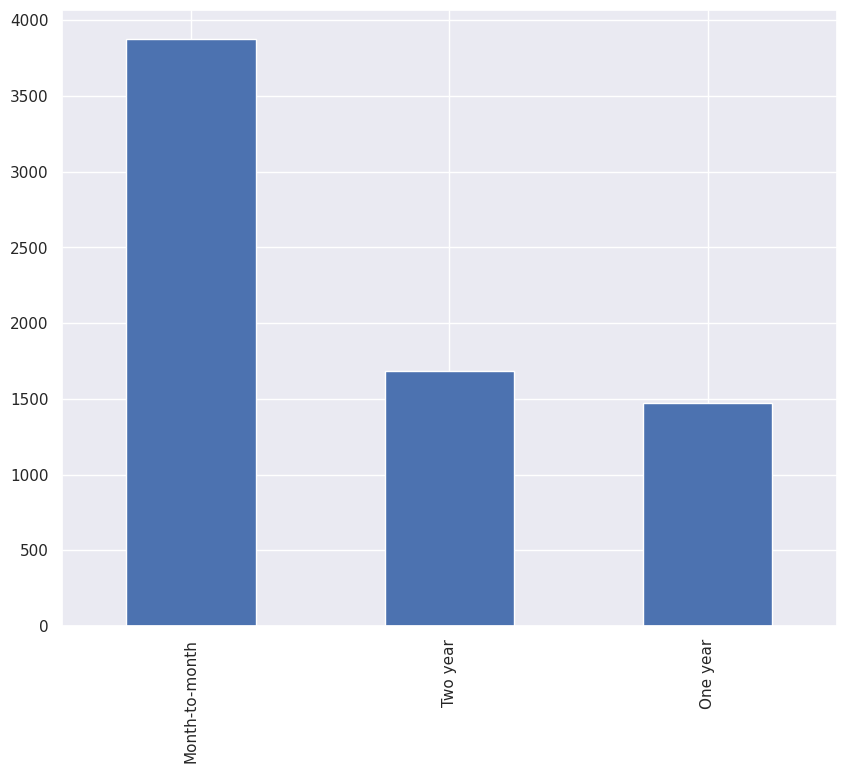

In [25]:
#@title EDA- feature analysis - Contract
sns.set(rc={'figure.figsize':(10,8)})
df['Contract'].value_counts().plot(kind='bar');

Observation: The bar plot of 'Contract' feature shows that the number of customers are more with montly contract, followed by 2 years and then 1 years. This is comparable to the distribution plot of 'tenure' feature.


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

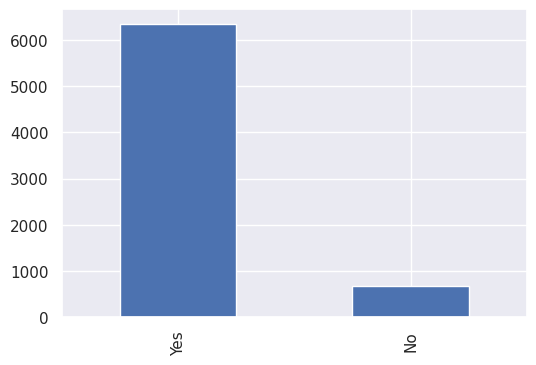

In [27]:
#@title EDA- feature analysis - Phone Service
sns.set(rc={'figure.figsize':(6,4)})
df['PhoneService'].value_counts().plot(kind='bar');

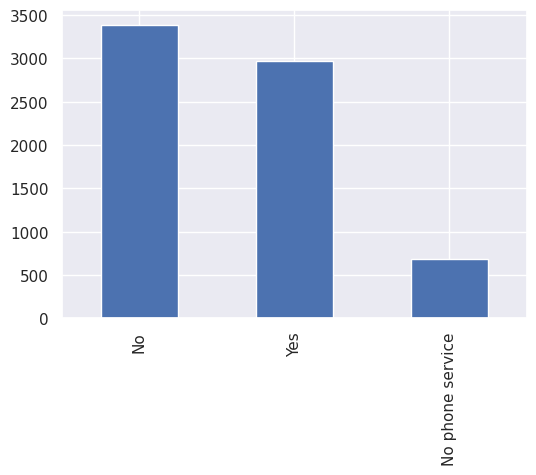

In [26]:
#@title EDA- feature analysis - MulitpleLines
sns.set(rc={'figure.figsize':(6,4)})
df['MultipleLines'].value_counts().plot(kind='bar');

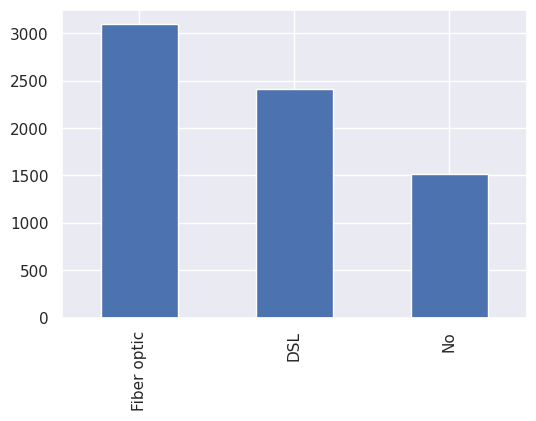

In [28]:
#@title EDA- feature analysis - InternetService
sns.set(rc={'figure.figsize':(6,4)})
df['InternetService'].value_counts().plot(kind='bar');

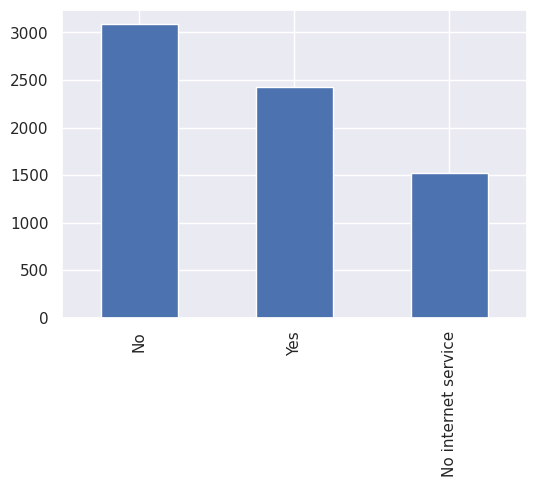

In [29]:
#@title EDA- feature analysis - OnlineBackup
sns.set(rc={'figure.figsize':(6,4)})
df['OnlineBackup'].value_counts().plot(kind='bar');

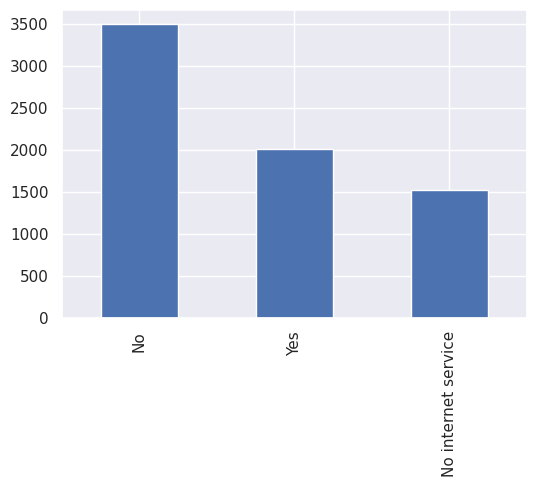

In [30]:
#@title EDA- feature analysis - OnlineSecurity
sns.set(rc={'figure.figsize':(6,4)})
df['OnlineSecurity'].value_counts().plot(kind='bar');

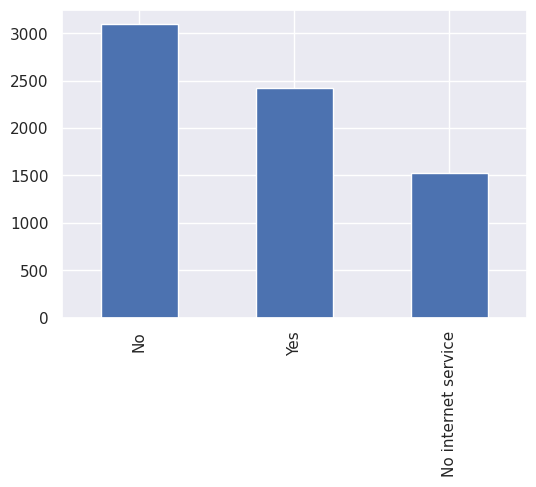

In [ ]:
#@title EDA- feature analysis - DeviceProtection
sns.set(rc={'figure.figsize':(6,4)})
df['DeviceProtection'].value_counts().plot(kind='bar');

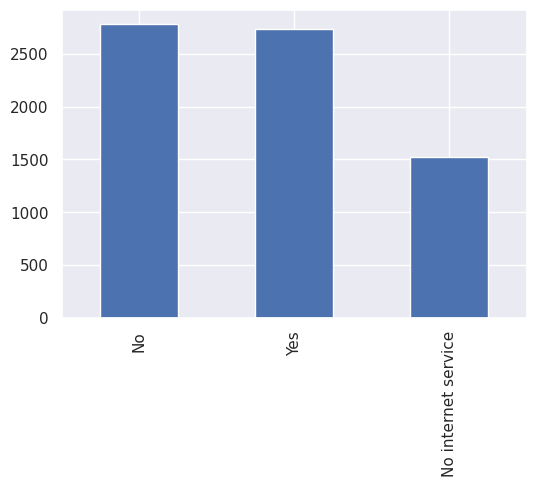

In [31]:
#@title EDA- feature analysis - StreamingMovies
sns.set(rc={'figure.figsize':(6,4)})
df['StreamingMovies'].value_counts().plot(kind='bar');

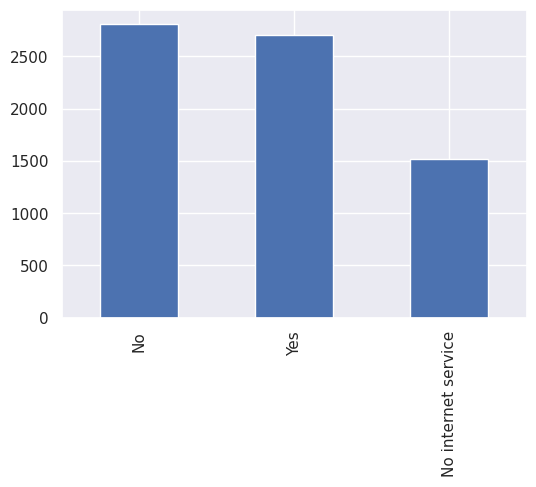

In [32]:
#@title EDA- feature analysis - StreamingTV
sns.set(rc={'figure.figsize':(6,4)})
df['StreamingTV'].value_counts().plot(kind='bar');

In [33]:
#@title Checking if the data is balanced. Churn proportion.
crosstab_churn = pd.crosstab(index = df['Churn'], columns='count', normalize=True)*100
crosstab_churn['count']


Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

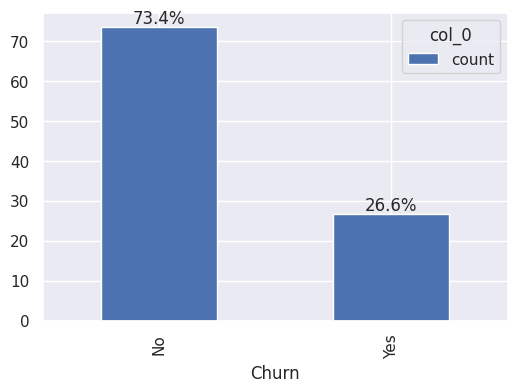

In [34]:
ax = crosstab_churn.plot(kind='bar', stacked=True);
percentages = crosstab_churn['count']
for i, percentage in enumerate(percentages):
    plt.annotate(f'{percentage:.1f}%', (i, percentages[i]), ha='center', va='bottom');

Observation : Data is not balanced!

# Data Modelling!

In [37]:
# Splitting train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [38]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [39]:
#@title Base model: Logistic Regression

from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(class_weight='balanced')
# training the model
log = model_log.fit(X_train, y_train)

In [40]:
#predicting data using trained model.
log_prediction = model_log.predict(X_test)

In [41]:
metrics.accuracy_score(y_test, log_prediction)

0.738388625592417

In [42]:
model_log.coef_[0]

array([ 0.22403911, -3.1784834 , -0.3091448 ,  1.49475822,  0.00392635,
       -0.00506399, -0.0627805 ,  0.06164286,  0.12585294, -0.12699058,
        0.07879947, -0.07993711, -0.12417356,  0.07879947,  0.04423645,
       -0.40131368,  0.51834957, -0.11817354,  0.24249479, -0.11817354,
       -0.12545889,  0.07931534, -0.11817354,  0.03772056,  0.07180134,
       -0.11817354,  0.04523456,  0.21846135, -0.11817354, -0.10142545,
       -0.08746096, -0.11817354,  0.20449686, -0.08495786, -0.11817354,
        0.20199375,  0.79550261, -0.08546115, -0.7111791 , -0.08827764,
        0.08714   , -0.01277316, -0.12474343,  0.23543011, -0.09905116])

Axes(0.125,0.11;0.775x0.77)


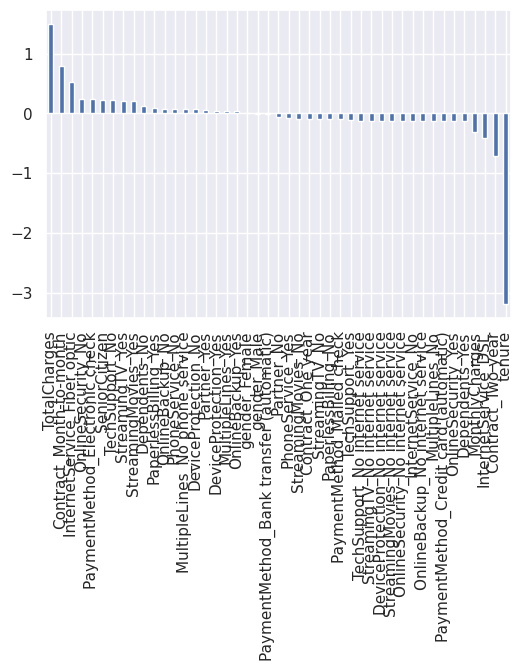

In [44]:
#@title significant features based on logistic regression model.
weights = pd.Series(model_log.coef_[0],
                 index=X.columns.values)
print(weights.sort_values(ascending = False)[:].plot(kind='bar'));

In [45]:
#@title Randomforest model
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=1000, random_state=42, max_features='auto', max_leaf_nodes=30)
model_rfc.fit(X_train, y_train)
rfc_prediction = model_rfc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [46]:
metrics.accuracy_score(y_test, rfc_prediction)

0.7943127962085308

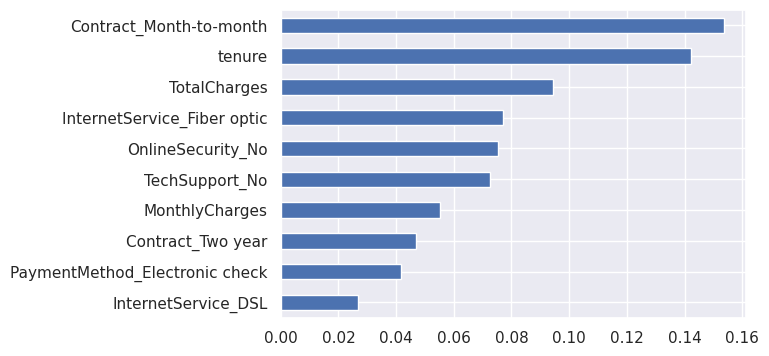

In [47]:
importances = model_rfc.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh');

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: ', precision_score(y_test, rfc_prediction)) # TP/(TP+FP)
print('Recall: ', recall_score(y_test, rfc_prediction)) # TP/(TP+FN)
print('F1: ', f1_score(y_test, rfc_prediction)) # 2*precision*recall/(precision+recall)

Precision:  0.6640826873385013
Recall:  0.45811051693404636
F1:  0.5421940928270043


In [53]:
#@title Support Vector Classifier
from sklearn.svm import SVC

In [54]:
model_svm = SVC(kernel='linear')
model_svm.fit(X_train,y_train)
svm_prediction = model_svm.predict(X_test)

In [55]:
metrics.accuracy_score(y_test, svm_prediction)

0.7914691943127962

In [56]:
from sklearn.metrics import  confusion_matrix
print(confusion_matrix(y_test,svm_prediction))

[[1371  178]
 [ 262  299]]


In [60]:
print('Precision: ', precision_score(y_test, svm_prediction)) # TP/(TP+FP)
print('Recall: ', recall_score(y_test, svm_prediction)) # TP/(TP+FN)
print('F1: ', f1_score(y_test, svm_prediction)) # 2*precision*recall/(precision+recall)#

Precision:  0.6268343815513627
Recall:  0.5329768270944741
F1:  0.5761078998073217


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model_svm, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importance scores
importance_scores = result.importances_mean

# Print feature importance scores
feature_weights = []
for i, score in enumerate(importance_scores):
    feature_weights.append(score)


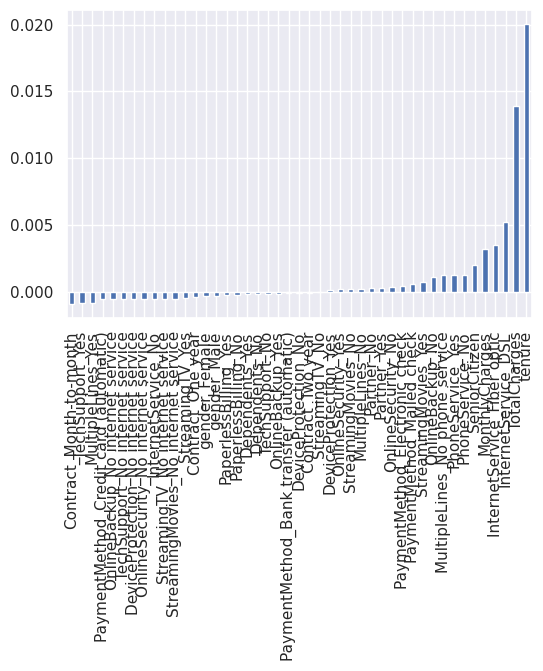

In [ ]:
weights = pd.Series(feature_weights,
                 index=X.columns.values)
weights.sort_values().plot(kind = 'bar');

In [61]:
#@title XGBoost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7796208530805687

In [62]:
print('Precision: ', precision_score(y_test, preds)) # TP/(TP+FP)
print('Recall: ', recall_score(y_test, preds)) # TP/(TP+FN)
print('F1: ', f1_score(y_test, preds)) # 2*precision*recall/(precision+recall)

Precision:  0.6016949152542372
Recall:  0.5062388591800356
F1:  0.5498547918683446
